In [1]:
import sklearn
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold,train_test_split,cross_val_score,cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)
pd.options.display.max_rows = 10

In [2]:
df = pd.concat([pd.read_csv('vk_dataset_only_text.csv', sep=';'),
                pd.read_csv('vk_dataset_2ipru.csv', sep=';'),
                pd.read_csv('vk_dataset_2ruhu.csv', sep=';'),
                pd.read_csv('vk_dataset_1oppo.csv', sep=';')], ignore_index=True)
df = df.dropna(subset=['text'])
df

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,group_url,user_id,first_name,last_name,sex,bdate,interests,books,tv,quotes,...,political,smoking,religion,langs,inspired_by,text,comments,likes,reposts,views
0,samsung.galaxy_a,3744,Alexander,Ageyev,2,10.5,NaN,NaN,NaN,NaN,...,5.0,2.0,Верю,Русский English,Муза,"""hear you screaming..."" © UPD 8.05.2020 15:30 ...",0.000000,0.180000,0.000000,61.020000
1,samsung.galaxy_a,159133,Darya,Denisova,1,5.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Конфетки для тех, кому не безразлично здоровь...",0.000000,0.050000,0.000000,9.030000
2,samsung.galaxy_a,176360,Denis,Kuleshov,2,20.8.1983,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Прикол.ру,0.000000,0.797753,0.011236,24.629213
3,samsung.galaxy_a,237262,Marya,Belyaeva,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Каждый февраль для меня период кардин...,0.000000,17.560000,2.310000,7413.040000
4,samsung.galaxy_a,574640,Stanislav,Sorokin,2,14.1.1987,NaN,NaN,NaN,NaN,...,NaN,1.0,Православие,Русский English,NaN,"Модульная система ThinkTank, подвес/разгрузк...",0.654321,3.543210,0.172840,13.975309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31406,ru_oppo,368447294,Egor,Vorykhalov,2,23.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Русский Українська,NaN,"Егор, а я знаю, сколько раз ты любил 😊 Узнай ...",0.010417,0.135417,0.010417,2.010417
31410,ru_oppo,368523294,Nikolay,Efremov,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Русский,NaN,Привет! \r\nЯ сейчас прохожу обучение у Виктор...,0.030000,0.650000,0.010000,14.350000
31412,ru_oppo,368529395,Katerina,Kononets,1,29.7,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,Русский English,NaN,,0.034483,1.862069,0.344828,54.965517
31413,ru_oppo,368537590,Paul,Sellm,2,1.4.1986,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,0.000000,0.575342,0.027397,0.534247


In [11]:
clustered = pd.read_csv('sentimented_dataset.csv')[pd.read_csv('sentimented_dataset.csv').from_id > 0]
clustered

,group_url,from_id,owner_id,text,label
1,samsung.galaxy_a,563762178,-24240100,Можно ли поставить гугл камеру на j8?,0
4,samsung.galaxy_a,40969143,-24240100,Здравствуйте. Где можно скачать гугл камеру? А71,0
5,samsung.galaxy_a,40969143,-24240100,"Здравствуйте, недавно купил а71, шнур зарядный...",0
6,samsung.galaxy_a,367048406,-24240100,Как вам панелька ? Самсунг А50.\r\n\r\nОткрыва...,0
8,samsung.galaxy_a,512666428,-24240100,Помогите найти эту картинку как на раб столе,0
...,...,...,...,...,...
7889,ru_oppo,189630066,-139809093,Уже второй год компания Oppo ведет работу над ...,0
7890,ru_oppo,189630066,-139809093,Китайский бренд Oppo готовит к релизу свои топ...,0
7891,ru_oppo,375540195,-139809093,OPPO брат естественных условиях,0
7892,ru_oppo,189630066,-139809093,Представители компании Oppo вчера сообщили о т...,0


In [16]:
df.loc[df.user_id.isin(clustered.from_id)]

,group_url,user_id,first_name,last_name,sex,bdate,interests,books,tv,quotes,...,political,smoking,religion,langs,inspired_by,text,comments,likes,reposts,views
18,samsung.galaxy_a,2123490,Max,Borodenko,2,1.11.1984,"иностранные языки, баскетбол, streetball, поэз...","Габриель Гарсиа Маркес-100 лет одиночества, Ос...",Comedy Club,"Славте меня,я великим не чета,\nЯ над всем, чт...",...,6.0,NaN,Религиозно гляжу!!!,Русский English Français Español,NaN,Happy Birthday King! Бил Гейтс чипирует Ни...,0.10,0.588889,0.000000,26.588889
21,samsung.galaxy_a,2568167,Alexander,Dorofeev,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Й Мезенский район вышел в ФИНАЛ по баскетболу ...,0.00,2.097826,0.043478,80.880435
43,samsung.galaxy_a,4820078,Tatyana,Styazhkina,1,22.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,В добрый путь... Как же быстро летит время... ...,0.00,9.640000,0.000000,82.930000
48,samsung.galaxy_a,5033502,Andrey,Alfadog,2,28.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Лежишь такой. Никого не трогаешь 😅😅😅 Дача ёп...,0.00,0.310000,0.010000,11.180000
64,samsung.galaxy_a,6479306,Dmitry,Isaev,2,28.12.1977,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Уважаемые разработчики ВКонтакте верните возмо...,0.08,0.140000,0.000000,19.540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26411,huaweip20,399145172,Ermek,Alikov,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,РОЗЫГРЫШ НОУТБУКА MSI GL63 Я играю в Мафию! П...,0.00,0.160000,0.000000,13.480000
28170,ru_oppo,189630066,Max,Antonov,2,31.10.1978,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,В оболочке MIUI 12 можно достаточно быстро и л...,0.00,0.000000,0.000000,1.020202
28276,ru_oppo,198288335,Aygerim,Kleukina,1,19.2,NaN,NaN,NaN,NaN,...,NaN,0.0,Ислам,Қазақша Русский,NaN,От луны до Марса 💜 ❤ Всегда и навечно❤\r\n\r\...,0.00,2.780000,0.000000,20.320000
29876,ru_oppo,294803177,Darya,Topchuk,1,7.6.1991,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,#tourer.✓ #Карпил18 #Расспил_17 #Расспил_16,0.00,0.250000,0.000000,86.650000


In [17]:
df.columns

Index(['group_url', 'user_id', 'first_name', 'last_name', 'sex', 'bdate',
       'interests', 'books', 'tv', 'quotes', 'about', 'games', 'movies',
       'music', 'status', 'followers_count', 'relation', 'city', 'country',
       'alcohol', 'life_main', 'people_main', 'political', 'smoking',
       'religion', 'langs', 'inspired_by', 'text', 'comments', 'likes',
       'reposts', 'views'],
      dtype='object')

In [18]:
df.groupby('group_url').count()[['user_id']]

,user_id
group_url,
huaweip20,922
kupit_iphone_v_moskve,2034
ru_oppo,1978
rumicomrussia,914
samsung.galaxy_a,1421


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7269 entries, 0 to 31414
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   group_url        7269 non-null   object 
 1   user_id          7269 non-null   int64  
 2   first_name       7269 non-null   object 
 3   last_name        7269 non-null   object 
 4   sex              7269 non-null   int64  
 5   bdate            5905 non-null   object 
 6   interests        804 non-null    object 
 7   books            676 non-null    object 
 8   tv               548 non-null    object 
 9   quotes           699 non-null    object 
 10  about            657 non-null    object 
 11  games            615 non-null    object 
 12  movies           758 non-null    object 
 13  music            816 non-null    object 
 14  status           3222 non-null   object 
 15  followers_count  7269 non-null   float64
 16  relation         3396 non-null   float64
 17  city         

In [20]:
from sklearn.utils import resample

balanced = pd.concat([resample(df[df.group_url == 'huaweip20'].iloc[:914, :], n_samples=1000),
           resample(df[df.group_url == 'kupit_iphone_v_moskve'].iloc[:914, :], n_samples=1000),
           resample(df[df.group_url == 'rumicomrussia'].iloc[:914, :], n_samples=1000),
           resample(df[df.group_url == 'samsung.galaxy_a'].iloc[:914, :], n_samples=1000),
           resample(df[df.group_url == 'ru_oppo'].iloc[:914, :], n_samples=1000)], ignore_index=True)

balanced

,group_url,user_id,first_name,last_name,sex,bdate,interests,books,tv,quotes,...,political,smoking,religion,langs,inspired_by,text,comments,likes,reposts,views
0,huaweip20,258508346,Azamat,Mirsaidov,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,Русский,NaN,,0.000000,0.090000,0.020000,1.360000
1,huaweip20,311345214,Elena,Komissarova,1,2.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Русский,NaN,,0.020000,0.330000,0.000000,9.230000
2,huaweip20,110649729,Natalya,Bubenschikova,1,24.4,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,"🍒УВАЖАЕМЫЕ МАМЫ,СТУДЕНТЫ,ДОМОХОЗЯЙКИ,ВСЕХ ЖЕЛА...",2.157895,1.473684,0.000000,33.210526
3,huaweip20,168003714,Alexander,Bykov,2,30.8,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,Русский English,Некоторые люди...,К 2020 году готовы!\r\n\r\n#НовыйГод #Новый202...,0.040000,0.850000,0.020000,20.080000
4,huaweip20,79181858,Dima,Efremenko,2,NaN,NaN,NaN,NaN,NaN,...,8.0,NaN,NaN,NaN,NaN,Узнай своих поклонниц в Android приложении - ...,0.000000,0.457831,0.000000,6.951807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ru_oppo,27100015,Sergiy,Lisovy,2,30.11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Дякую Братан дуже приємно ) Братішка))) ...,0.000000,5.337500,0.012500,0.000000
4996,ru_oppo,159775039,Ashot,Papyan,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ASTGHIK SAFARYAN | SEV AKNOTS | 2011 | Officia...,0.000000,0.375000,0.000000,0.000000
4997,ru_oppo,22046189,Vyacheslav,Babyonyshev,2,29.10.1973,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,https://www.youtube.com/channel/UCNVItJhO0SPS8...,0.061728,0.308642,0.000000,1.555556
4998,ru_oppo,93279611,Stepan,Bandera,2,1.8,NaN,NaN,NaN,NaN,...,6.0,2.0,Православие,Русский,NaN,Отзывы о моей работе: Mc.Govorun#lviv#Rafi...,0.066667,7.222222,0.011111,118.788889


# Training

In [21]:
X, y = balanced.loc[:, 'text'], balanced[['group_url']]

In [22]:
import re
from nltk.stem.snowball import SnowballStemmer

def cleaning_data(code_data):
    text = code_data
    text = text.replace('(<br/>)', '')
    text = text.replace('(<a).*(>).*(</a>)', '')
    text = text.replace('(&amp)', '')
    text = text.replace('(&gt)', '')
    text = text.replace('(&lt)', '')
    text = text.replace('(\xa0)', ' ')
    text = filtering(text)
    #text = stemmering(text)
    return text.strip()

def filtering(text):
    stripped = re.sub('[^a-zA-Z, ^А-Я,а-я]', ' ', str(text).replace('-', ''))
    stripped = re.sub('_', '', stripped)
    stripped = re.sub('\s+', ' ', stripped)
    return str(stripped).lower()

def stemmering(text):
    stemmer = SnowballStemmer("russian")
    return ' '.join([stemmer.stem(word) for word in text.split(' ')])

In [23]:
X = pd.DataFrame(list(map(cleaning_data, X.tolist())))[0]

In [24]:
#y = list(map(lambda x: 0 if x == 'kupit_iphone_v_moskve' else 1 if x == 'rumicomrussia' else 2, y))

In [25]:
y = y[(X != '').values]
X = X[(X != '').values]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train))
print(len(X_test))

3151
788


In [27]:
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(lowercase=True, sublinear_tf=True, smooth_idf=True, min_df=0.001, max_df=0.01)
x_train_tf = vectorizer.fit_transform(X_train)
x_test_tf = vectorizer.transform(X_test)
print(x_train_tf.shape)

(3151, 10859)


In [28]:
import itertools

def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='Greens'):
    df = pd.DataFrame(classificationReport).T.iloc[:,:3]
    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    return df

In [29]:
model = GaussianNB()
model.fit(x_train_tf.toarray(), y_train)

predictions = model.predict(x_test_tf.toarray())

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


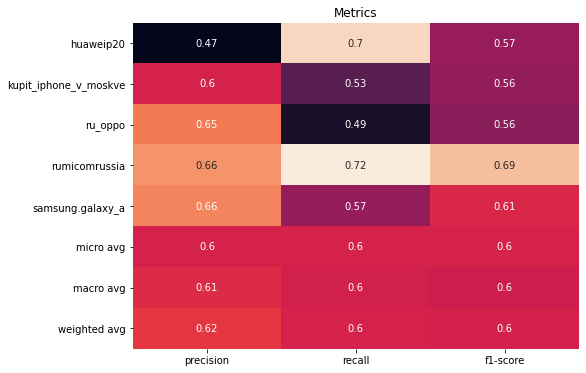

In [30]:
sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

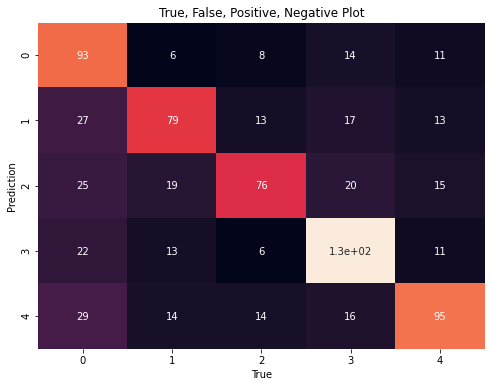

In [31]:
sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False)

plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()